In [155]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

In [156]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [157]:
import pyflux as pf

In [158]:
data = pd.read_csv('international-airline-passengers.csv', usecols=[1])

In [159]:
data.columns = ["value"]
print(data.shape)
data.head(5)

(145, 1)


,value
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 1 columns):
value    144 non-null float64
dtypes: float64(1)
memory usage: 1.2 KB


In [161]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 1 columns):
value    144 non-null float64
dtypes: float64(1)
memory usage: 2.2 KB


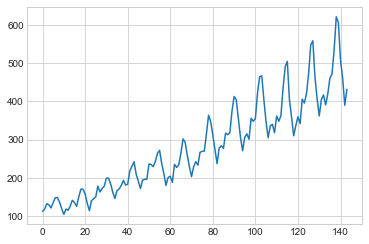

In [162]:
plt.plot(data)
plt.show()

In [173]:
alpha = 0.9
#N = int(alpha * data.shape[0])
N = 100
print(N)

100


In [174]:
data_train = data.iloc[:N].copy()
data_test = data.iloc[N:].copy()

data_train.shape, data_test.shape

((100, 1), (44, 1))

# Arima

In [175]:
model = pf.ARIMA(data=data_train, ar=12, ma=0, family=pf.Cauchy())
x = model.fit("MLE")
#x = model.fit(method='BBVI', iterations=10000, optimizer='ADAM', learning_rate = 0.01)
x.summary()

Cauchy ARIMA(12,0,0)                                                                                      
======================================================= ==================================================
Dependent Variable: value                               Method: MLE                                       
Start Date: 12                                          Log Likelihood: -344.5064                         
End Date: 99                                            AIC: 717.0127                                     
Number of observations: 88                              BIC: 751.6955                                     
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.0648     0.0073     8.8759   0.0      (0.0505 | 0.0791)        
AR(1)                                

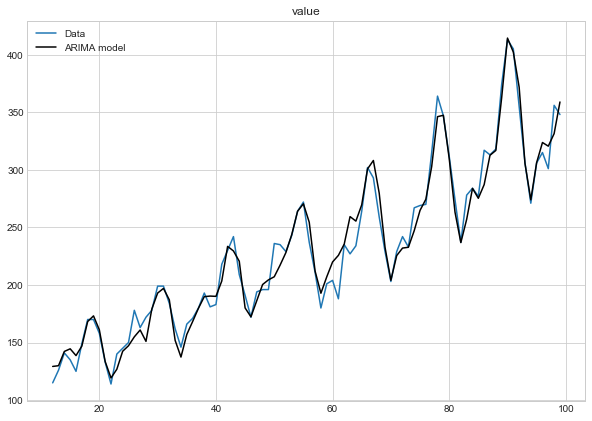

In [176]:
model.plot_fit()

In [177]:
predictions = model.predict(len(data_test))

In [178]:
predictions.head()

,value
100,370.576689
101,425.340370
102,471.413905
103,465.595256
104,423.392099


In [179]:
mape = mean_absolute_percentage_error(predictions, data_test)
mape

value    10.510832
dtype: float64

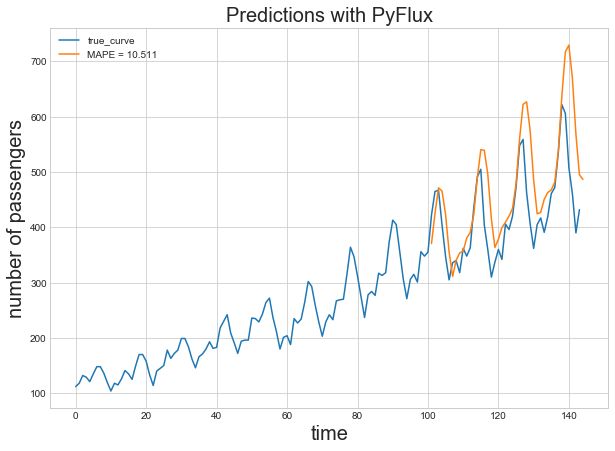

In [180]:
fig = plt.figure(figsize=(10, 7))

plt.plot(data, label = "true_curve")
#plt.plot(data_test.index.values + 1, predictions_lr, label = "linear regression")
#plt.plot(data_test.index.values + 1, predictions_cb, label = "catboost")
plt.plot(data_test.index.values + 1, predictions, 
         label = "MAPE = {0}".format(np.round(mape.value, 3)))

plt.xlabel("time", size = 20)
plt.ylabel("number of passengers", size = 20)
plt.title("Predictions with PyFlux", size = 20)
plt.legend()

plt.show()

In [181]:
x.summary()

Cauchy ARIMA(12,0,0)                                                                                      
======================================================= ==================================================
Dependent Variable: value                               Method: MLE                                       
Start Date: 12                                          Log Likelihood: -344.5064                         
End Date: 99                                            AIC: 717.0127                                     
Number of observations: 88                              BIC: 751.6955                                     
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 0.0648     0.0073     8.8759   0.0      (0.0505 | 0.0791)        
AR(1)                                

In [183]:
predictions.head()

,value
100,370.576689
101,425.340370
102,471.413905
103,465.595256
104,423.392099


**Как видно, мы получили довольно неплохой результат с ar = 12, ma = 0, и весами из Caushy.**

# Other Approaches

In [230]:
model = pf.VAR(data=data_train, lags=13, integ=0)
x = model.fit()
x.summary()

VAR(13)                                                                                                   
======================================================= ==================================================
Dependent Variable: value                               Method: OLS                                       
Start Date: 13                                          Log Likelihood: -313.0226                         
End Date: 99                                            AIC: 656.0452                                     
Number of observations: 87                              BIC: 693.0338                                     
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
value Constant                           2.2452     3.5433     0.6336   0.5263   (-4.6997 | 9.1902)       
value AR(1)                          

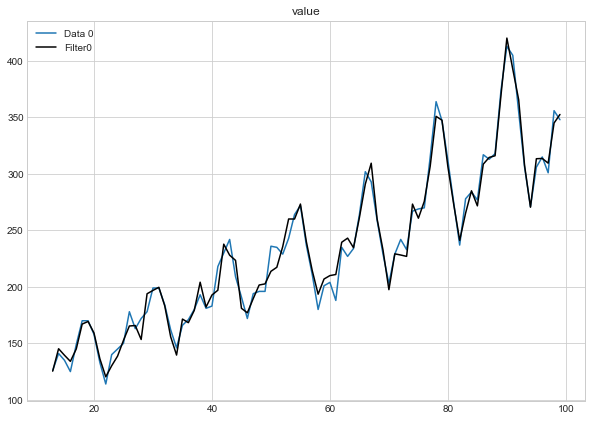

In [231]:
model.plot_fit()

In [232]:
predictions = model.predict(len(data_test))
predictions.head()

,value
100,360.770587
101,426.857781
102,466.836204
103,456.825498
104,403.407277


In [233]:
mape = mean_absolute_percentage_error(predictions, data_test)
mape

value    7.846993
dtype: float64

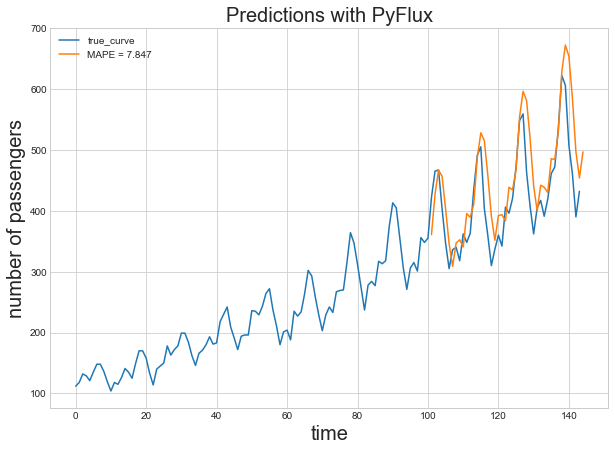

In [234]:
fig = plt.figure(figsize=(10, 7))

plt.plot(data, label = "true_curve")
#plt.plot(data_test.index.values + 1, predictions_lr, label = "linear regression")
#plt.plot(data_test.index.values + 1, predictions_cb, label = "catboost")
plt.plot(data_test.index.values + 1, predictions, 
         label = "MAPE = {0}".format(np.round(mape.value, 3)))

plt.xlabel("time", size = 20)
plt.ylabel("number of passengers", size = 20)
plt.title("Predictions with PyFlux", size = 20)
plt.legend()

plt.show()

**Немного улучшили результата, взяв простую регрессию.**